# Thermodynamics tutorial

### Part 3

Plot phase diagrams using a CALPHAD database



### Import modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

## Find CALPHAD database

Go to TDB DB (Thermodynamcs database database) https://avdwgroup.engin.brown.edu/

Search for the system you're interested in 

Download .tdb file and put it in the same folder as your Jupyter notebook

In [2]:
#Load database
dbf = Database('Al-Cu.tdb') #https://www.sciencedirect.com/science/article/pii/S0925838809019537?via%3Dihub

# Get all possible phases
phases = dbf.phases.keys()

In [3]:
#Print phases in the thermodynamic database
print(phases)

#The name of the phases are usually the conventional ones
#To know their crystal structure one will have to read the database file or the article from which the data came from

dict_keys(['LIQUID', 'BCC', 'FCC', 'HCP', 'ALCU_DELTA', 'ALCU_EPSILON', 'ALCU_ETA', 'ALCU_THETA', 'ALCU_ZETA', 'ALCU_GAMMA_D83', 'ALCU_GAMMA_H', 'LAVES_C14', 'LAVES_C15', 'LAVES_C36'])


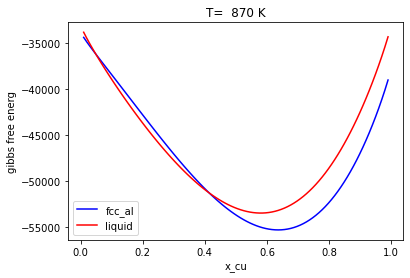

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


def gibbs_function_solution_phases(R,T,steps,elements,G_0,L):
    x = np.linspace(0, 1.0, num=steps)
    x_cu = x
    x_al = 1-x
    X = np.array([x_al,x_cu])
    G = np.zeros(np.shape(x))
    for i in range(np.shape(elements)[0]):
        G+= (X[i]*G_0[i]) + (R*T*X[i]*np.log(X[i]))
    for j in range(np.shape(L)[0]):
        G+=X[0]*X[1]*((X[0]-X[1])**j)*L[j]
    return G

R = 8.3145
T = 870
steps = 100
elements = ["Al", "Cu"]


#*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#                  L I Q U I D
#*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
L_alcu_liq_0 = 298.15-67094 + 8.555*T
L_alcu_liq_1 = 298.15+32148-7.118*T
L_alcu_liq_2 = 298.15+5915-5.889*T
L_alcu_liq_3 = 298.15-8175+6.049*T
L_liq = np.array([L_alcu_liq_0, L_alcu_liq_1, L_alcu_liq_2, L_alcu_liq_3])

if 298.15<T and T<700:
    G_al_liq_0 = 298.15+3028.879+125.251171*T-24.3671976*T*np.log(T)-1.884662E-3*T**2-0.877664E-6*T**3+74092*T**(-1)+79.337E-21*T**7
if 700 < T and T < 933.47:
    G_al_liq_0 = 298.15-271.21+211.206579*T-38.5844296*T*np.log(T)+18.531982E-3*T**2-5.764227E-6*T**3+74092*T**(-1)+79.337E-21*T**7
if 933.47< T and T < 2900:
    G_al_liq_0 = 298.15-795.996+177.430178*T-31.748192*T*np.log(T) 
    
if 298.15<T and T<1357.77:
    G_cu_liq_0 = 298.15+5194.277+120.973331*T-24.112392*T*np.log(T)-2.65684E-3*T**2+0.129223E-6*T**3+52478*T**(-1)-584.9E-23*T**7;
if 1357.77 < T and T < 3200:
    G_cu_liq_0 = 298.15-46.545+173.881484*T-31.38*T*np.log(T)
    
G_0_liq = np.array([G_al_liq_0,G_cu_liq_0])


#*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
#                  F C C _ A l
#*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
L_alcu_fcc_al_0 = 298.15-53520+2*T
L_alcu_fcc_al_1 = 298.15+38590-2*T
L_alcu_fcc_al_2 = 298.15+1170
L_fcc = np.array([L_alcu_fcc_al_0, L_alcu_fcc_al_1, L_alcu_fcc_al_2])

if 290.15<T and T <700:
    G_al_fcc_0 = 298.15 - 7976.15 + 137.093038*T-24.3671976*T*np.log(T)-1.884662e-3*T**2-0.877664e-6*T**3 + 74092*T**(-1)
if 700<T and T <933.47:
    G_al_fcc_0 = 298.15 -11276.24 + 223.048446*T-38.5844296*T*np.log(T)+18.531982e-3*T**2-5.764227e-6*T**3+74092*T**(-1)
if 933.47 < T and T<2900:
    G_al_fcc_0 = 298.15-11278.378 + 188.684153 * T -31.748192*T*np.log(T) - 1.231e28*T**(-9)
    
if 290.15<T and T <1357.77:
    G_cu_fcc_0 = 298.15-7770.458+130.485235*T-24.112392*T*np.log(T)-2.65684E-3*T**2+0.129223E-6*T**3+52478*T**(-1)
if 1357.77<T and T <3200:
    G_cu_fcc_0 = 298.15 -13542.026+183.803828*T-31.38*T*np.log(T)+364.2E27*T**(-9)
    
G_0_fcc = np.array([G_al_fcc_0,G_cu_fcc_0])


#calculate the gibbs energy curves
G_fcc= gibbs_function_solution_phases(R,T,steps,elements,G_0_fcc,L_fcc)
G_liq= gibbs_function_solution_phases(R,T,steps,elements,G_0_liq,L_liq)

x = np.linspace(0, 1.0, num=steps)

#plot
fig, ax = plt.subplots() #figsize=(10,10)

ax.plot(x,G_fcc, label="fcc_al", color="blue")
ax.plot(x,G_liq,label="liquid",color="red")

plt.xlabel("x_cu")
plt.ylabel("gibbs free energ")
ax.title.set_text("T= % d K" % T)
#x.set_xlim(0,0.1)
plt.legend()
plt.show()

#find equilibrium

#plot tie-line

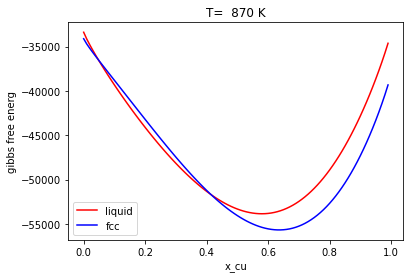

In [14]:
#Generate the curves using pycalphad
import matplotlib.pyplot as plt
from pycalphad import equilibrium
from pycalphad import Database, Model
import pycalphad.variables as v
import numpy as np

db = Database('Al-Cu.tdb')
T = 870
eq_liq = equilibrium(db, ['AL', 'CU'], ['LIQUID'], { v.X('CU'):(0, 1, 0.01),v.T: T, v.P: 101325})
eq_fcc = equilibrium(db, ['AL', 'CU'], ['FCC'], { v.X('CU'):(0, 1, 0.01),v.T: 870, v.P: 101325})

fig, ax = plt.subplots()

ax.plot(eq_liq['X_CU'].values, eq_liq['GM'].values.flatten(), label = "liquid",color="red")
ax.plot(eq_fcc['X_CU'].values, eq_fcc['GM'].values.flatten(), label = "fcc", color="blue")

plt.xlabel("x_cu")
plt.ylabel("gibbs free energ")
ax.title.set_text("T= % d K" % T)
plt.legend()
plt.show()

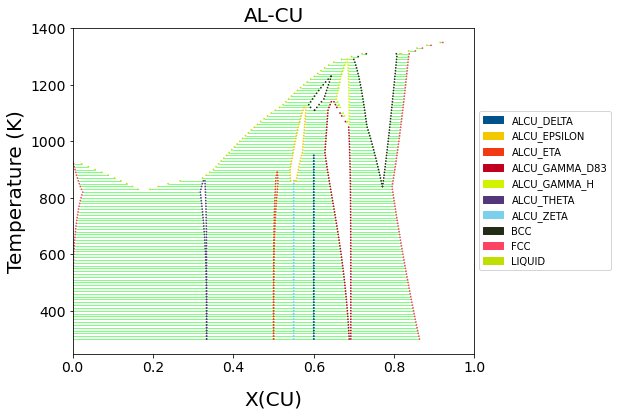

In [7]:
#Set conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (300, 1400, 10),  # (start, stop, step)
    v.X('CU'): (0, 1.0, 0.01),   # (start, stop, step)
}

#Set components, here we have aluminium, copper and vacancies
comps = ['AL', 'CU', 'VA']

#Create a matplotlib Figure object
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

#Compute the phase diagram
binplot(dbf, comps , phases, conds, plot_kwargs={'ax': axes})

#Plot!
plt.show()

## Lets play around with the calphad database and the phase diagram

This will give us a better understanding of our system and what possible phases we may expect at different conditions

#### How does the amount of each phase change depending on temperature?

We can easily do this ourselves manually by using the lever rule. 

The phases that are in equilibrium are: ['ALCU_THETA', 'FCC', 'LIQUID']


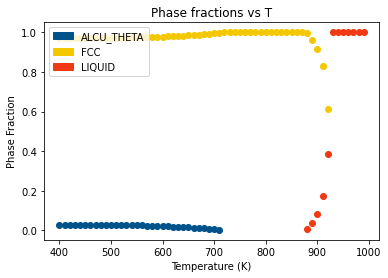

In [8]:
from pycalphad.plot.utils import phase_legend

# For specifying in terms of mass fractions; can also specify in mole fractions using v.X
cu_composition = 0.01 # mole fraction

start_temp = 400 # K
end_temp = 1000 # K
step_size = 10 # K

eq = equilibrium(dbf, comps, phases, {v.N: 1, v.P: 101325, v.T: (start_temp, end_temp, step_size), v.X('CU'): cu_composition})

phases = sorted(set(eq.Phase.values.flatten()) - {''})

print("The phases that are in equilibrium are:", phases)


#Now, plot their fraction with changing temperature
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Phase Fraction')

for name in phases:
    plt.scatter(eq.T.broadcast_like(eq.NP), eq.NP.where(eq.Phase == name), color=phasemap[name])
    
plt.gca().legend(phase_handles, phases, loc='upper left')